# Part - 1: Health Data

In [1]:
set.seed(1)
library(readxl)
health_df = read_excel("data/Health.xlsx")
head(health_df)

X1,X2,X3,X4,X5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.0,78,284,9.1,109
9.3,68,433,8.7,144
7.5,70,739,7.2,113
8.9,96,1792,8.9,97
10.2,74,477,8.3,206
8.3,111,362,10.9,124


In [2]:
cat("Dimesions of the data:",dim(health_df))

Dimesions of the data: 53 5

In [3]:
paste("Number of NA Values: ",sum(is.na(health_df)))

[1] "Number of NA Values:  0"

### Exploratory Data Analysis

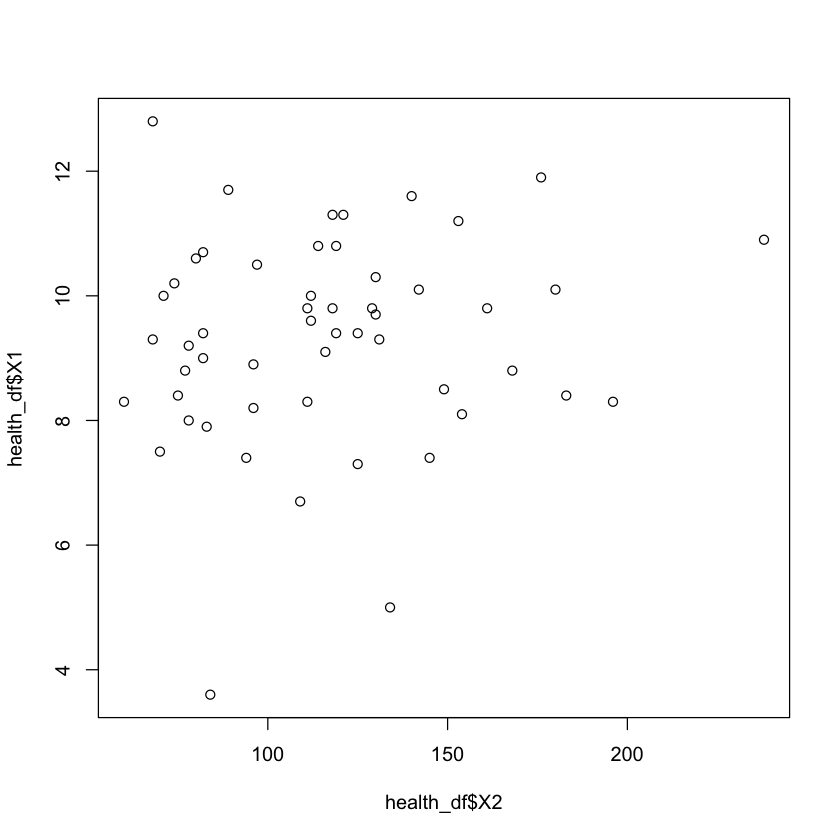

In [4]:
plot(x = health_df$X2, y=health_df$X1)

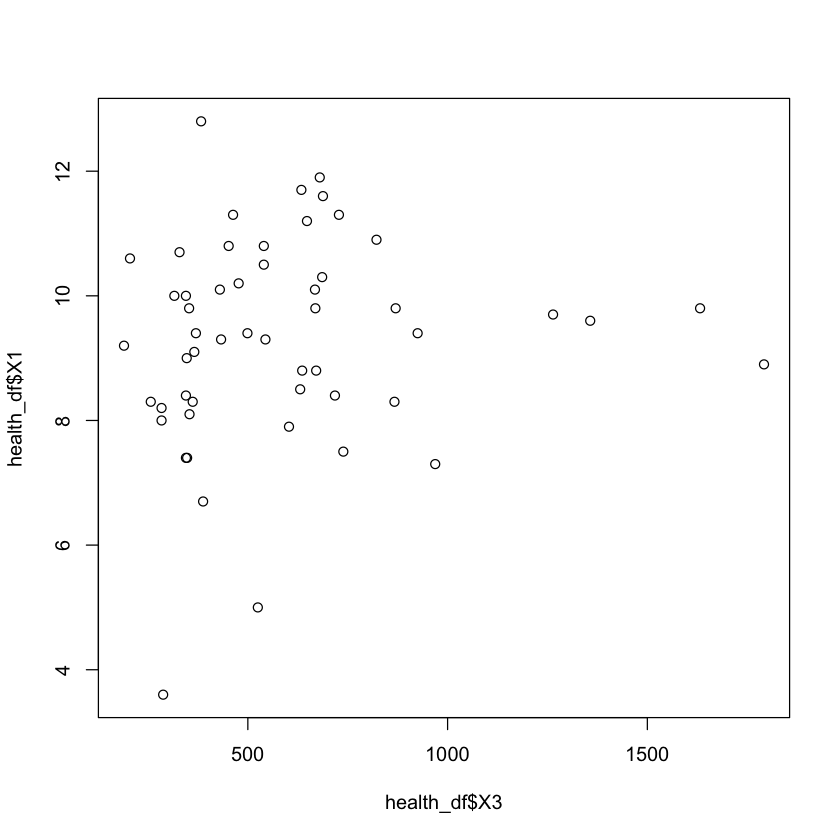

In [5]:
plot(x = health_df$X3, y=health_df$X1)

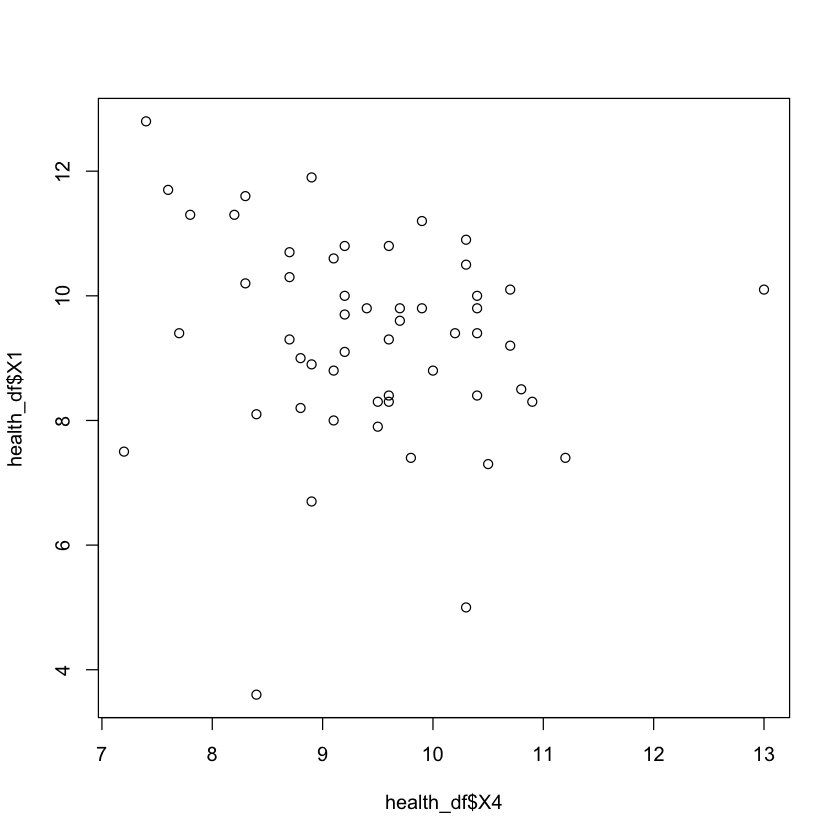

In [6]:
plot(x = health_df$X4, y=health_df$X1)

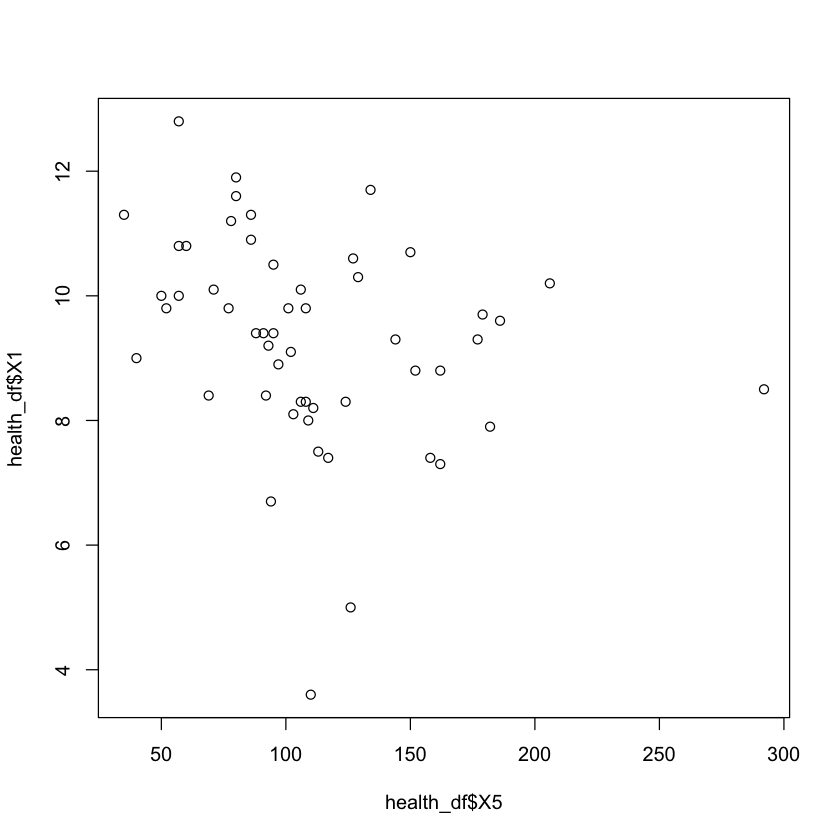

In [7]:
plot(x = health_df$X5, y=health_df$X1)

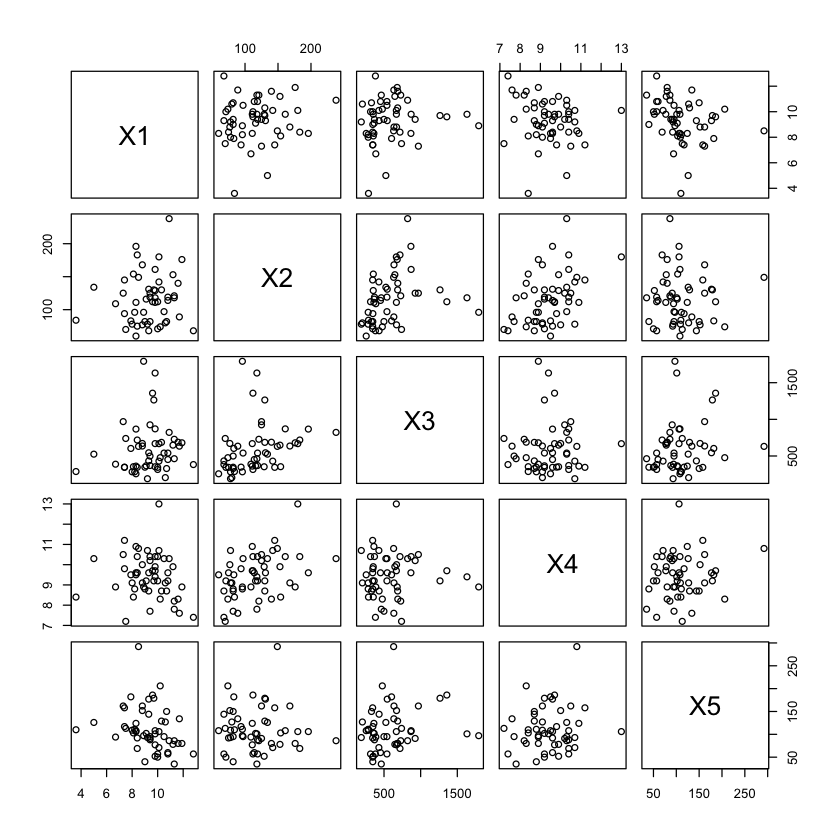

In [8]:
pairs(health_df)

#### To Estimate test error we use  K-Fold cross validation.

### Linear Regression

In [9]:
set.seed(1)
library(boot)
lm_model = glm(X1 ~ X2 + X3 + X4 + X5, data = health_df)
lm_cv_model = cv.glm(data=health_df, lm_model, K = 5)
cv_error = lm_cv_model$delta[1]

print(paste("CV error:", cv_error))

[1] "CV error: 2.83255913388255"


* On Performing Cross Validation the estimated test error for linear regression was: 2.83

In [10]:
set.seed(1)
lm_model <- lm(X1 ~ X2 + X3 + X4 + X5, data = health_df)
summary(lm_model)


Call:
lm(formula = X1 ~ X2 + X3 + X4 + X5, data = health_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6404 -0.7904  0.3053  0.9164  2.7906 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.2662552  2.0201467   6.072 1.95e-07 ***
X2           0.0073916  0.0069336   1.066   0.2917    
X3           0.0005837  0.0007219   0.809   0.4228    
X4          -0.3302302  0.2345518  -1.408   0.1656    
X5          -0.0094629  0.0048868  -1.936   0.0587 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.601 on 48 degrees of freedom
Multiple R-squared:  0.1437,	Adjusted R-squared:  0.07235 
F-statistic: 2.014 on 4 and 48 DF,  p-value: 0.1075


* The P - value of F - statistic says that no predictor has significant effect on the the response.
* The P-values of t-statistic says that only predictor X5 has effect on the response.

In [11]:
# Confidence interval of Coefficeints
confint (lm_model)

,2.5 %,97.5 %
(Intercept),8.2044779685,1.632803e+01
X2,-0.0065494163,2.133265e-02
X3,-0.0008677875,2.035219e-03
X4,-0.8018281444,1.413677e-01
X5,-0.0192884855,3.627158e-04


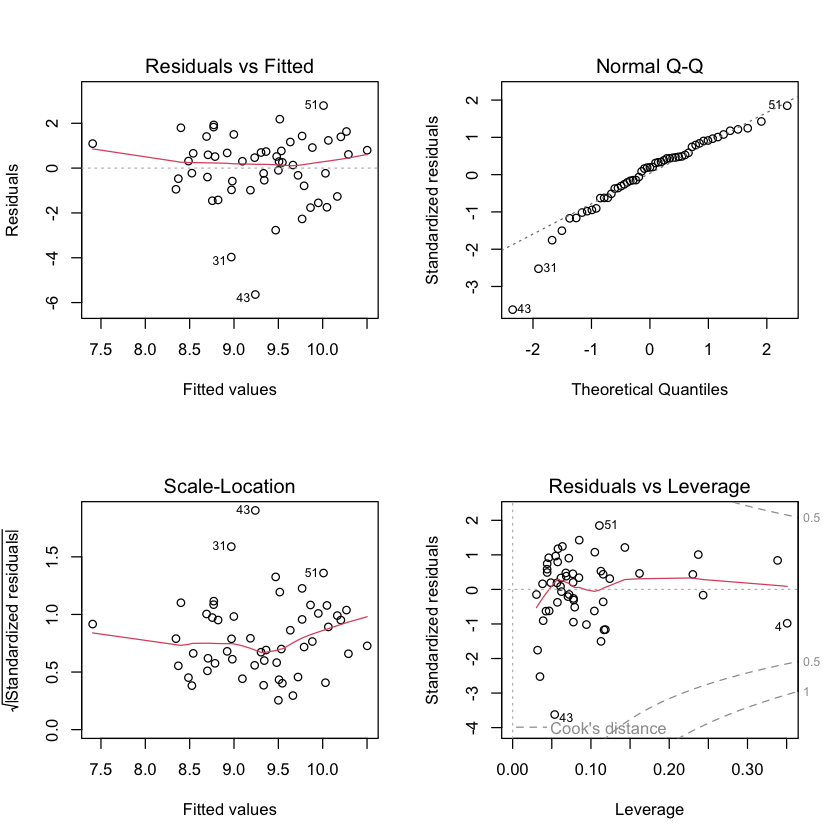

In [12]:
par(mfrow = c(2,2))
plot(lm_model)

Problems in the fit: <br>
1. The Residual vs Fitted Values shows no significant non-linearity in the data.
2. The plot also says that there is constant variance in the errors, which shows that our assumption that errors $\epsilon$ has constant variance is right. This is further justified by the Fitted Values vs $\sqrt{Standardized-residuals}$ plot. 
3. The quantile-quantile plot showed errors deviating from the normality assumption at left end of the tail.
4. In the bottom-right plot we can see, some points have standardized residuals greater than 3, which makes them outliers.
5. The cutoff for the leverage point threshold is $\frac{2p}{n}$ where p is the number of predictors, which is one in this case, and n is the number of observations, which is 53 in this case. Therefore, the cutoff is $\frac{2*4}{53} = 0.151$. Hence, there are some leverage points in this dataset.
6. As some observations qualified as both outliers and leverage points, we can safely say we have some influential points.

### Subset Selection

In [13]:
set.seed(1)
# Load the leaps package
library(leaps)

# Perform best subset selection using the regsubsets function
subset_model <- regsubsets(X1 ~ X2 + X3 + X4 + X5, data = health_df, nvmax = 4)

summary(subset_model)


Subset selection object
Call: regsubsets.formula(X1 ~ X2 + X3 + X4 + X5, data = health_df, 
    nvmax = 4)
4 Variables  (and intercept)
   Forced in Forced out
X2     FALSE      FALSE
X3     FALSE      FALSE
X4     FALSE      FALSE
X5     FALSE      FALSE
1 subsets of each size up to 4
Selection Algorithm: exhaustive
         X2  X3  X4  X5 
1  ( 1 ) " " " " " " "*"
2  ( 1 ) " " "*" " " "*"
3  ( 1 ) "*" " " "*" "*"
4  ( 1 ) "*" "*" "*" "*"

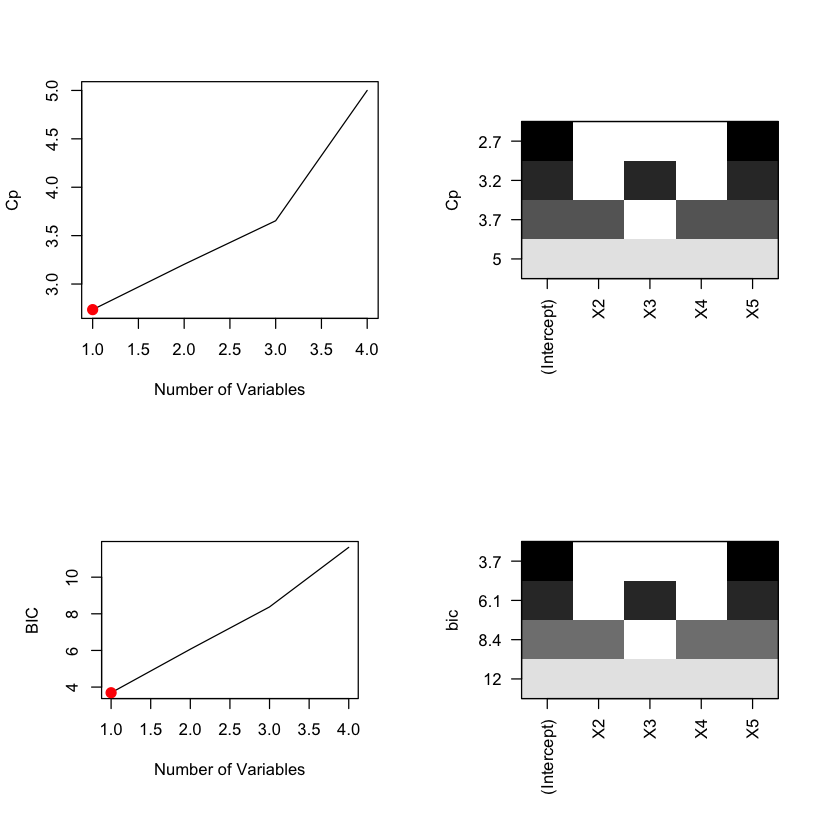

In [14]:
regfit_summary = summary(subset_model)

par(mfrow = c(2,2))

# Drawing plots for CP Metric
plot(regfit_summary$cp, xlab = "Number of Variables", ylab = "Cp",type = "l")
points(which.min(regfit_summary$cp), regfit_summary$cp[which.min(regfit_summary$cp)], col = "red", cex = 2, pch = 20)
plot(subset_model, scale = "Cp")

# Drawing plots for BIC Metric
plot(regfit_summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l")
points(which.min(regfit_summary$bic), regfit_summary$bic[which.min(regfit_summary$bic)], col = "red", cex = 2, pch = 20)
plot(subset_model, scale = "bic")


* Above plot show that model with one predictor does better than the rest.
* And the subset selection method shows that one preditor is X5, this goes hand in hand with what we observed with t-test p-values.

In [15]:
best_subset_lm_model = glm(X1 ~ X5, data = health_df)
best_subset_lm_cv_model = cv.glm(data=health_df, best_subset_lm_model, K = 5)
cv_error = best_subset_lm_cv_model$delta[1]

In [16]:
print(paste("CV error:", cv_error))

[1] "CV error: 2.65318961211693"


* On Performing Cross Validation the estimated test error for best subset selected linear regression(with only one predictor) was: 2.65

### Polynomial regression

In [17]:
set.seed(1)
options(warn = -1)
cv_error <- rep(0,10)
for (i in 1:10) {
  non_lin_reg <- glm(health_df$X1 ~ polym(health_df$X2, health_df$X3, health_df$X4, health_df$X5, degree = i))
  cv_error[i] <- cv.glm(health_df, non_lin_reg, K = 5)$delta[1]
}


In [18]:
print(paste("Minimum CV error:", min(cv_error)))
print(paste("Best degree:", which.min(cv_error)))

[1] "Minimum CV error: 2.91484676876147"
[1] "Best degree: 1"


* On performing Cross Validaton For different degrees of polynomial we found that 1st degree model has minimum test error.
* The test error was 2.91

### Ridge Regression

In [19]:
x = model.matrix(X1 ~ ., health_df)[, -1]
y = health_df$X1

In [20]:
library(glmnet)
set.seed(1)
# Set up the cross-validation grid
cv_grid = expand.grid(lambda = seq(from = 0.001, to = 10, length = 100))

# Perform cross-validation using the cv.glmnet function
rr_cv_model = cv.glmnet(x, y, alpha = 0, lambda = cv_grid$lambda, nfolds = 5)

# Select the best value of lambda
best_lambda = rr_cv_model$lambda.min

# Print the minimum cross-validation error
print(paste("Best Lambda Value:", best_lambda))

Loading required package: Matrix

Loaded glmnet 4.1-7



[1] "Best Lambda Value: 0.304"


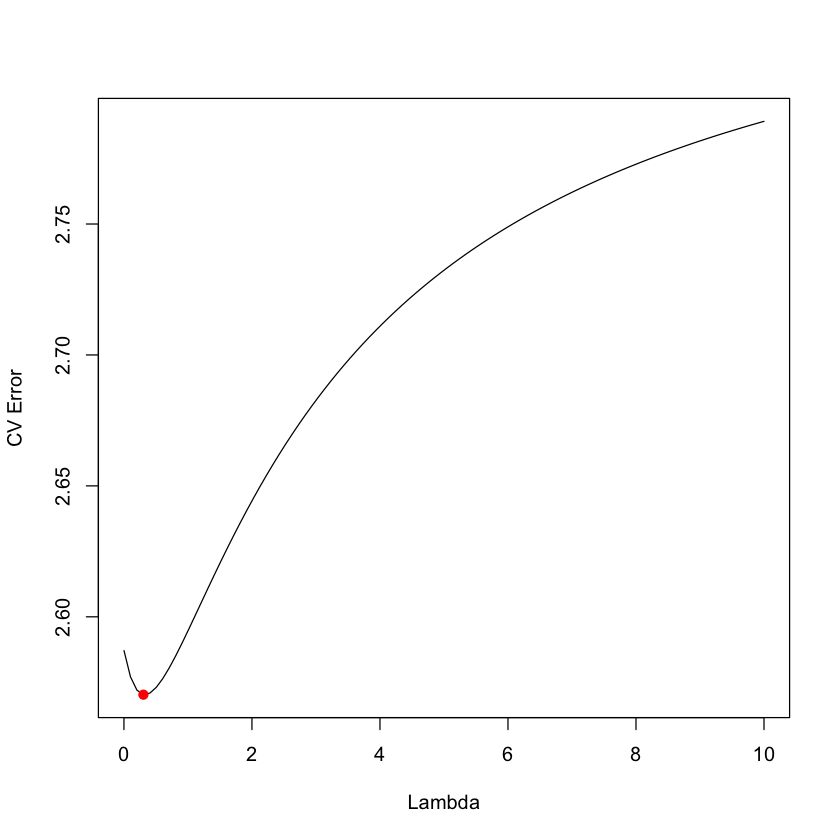

In [21]:
cv_error <- rr_cv_model$cvm

# Plot the cross-validation error curve
plot(rr_cv_model$lambda, cv_error, type = "l", xlab = "Lambda", ylab = "CV Error")
points(best_lambda, min(cv_error), col = "red", pch = 19)

In [22]:
# Get the minimum cross-validation error
min_cv_error = min(rr_cv_model$cvm)

# Print the minimum cross-validation error
print(paste("Minimum CV error:", min_cv_error, 'for the lambda value of', best_lambda))

[1] "Minimum CV error: 2.57026825735826 for the lambda value of 0.304"


* We got minimum CV error of 2.57 for the Lambda value of 0.304.

In [23]:
set.seed(1)
rr_best_model = glmnet(x, y, alpha = 0, lambda = best_lambda)
coef(rr_best_model)

5 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept) 11.7231398460
X2           0.0057530764
X3           0.0005035695
X4          -0.2636432444
X5          -0.0080863202

* We can see that coefficient values shrinking towards zero.

### Lasso Regression

In [24]:

# Set up the cross-validation grid
cv_grid = expand.grid(lambda = seq(from = 0.001, to = 10, length = 100))

# Perform cross-validation using the cv.glmnet function
lasso_cv_model = cv.glmnet(x, y, alpha = 1, lambda = cv_grid$lambda, nfolds = 5)

# Select the best value of lambda
best_lambda = lasso_cv_model$lambda.min

# Print the minimum cross-validation error
print(paste("Best Lambda Value:", best_lambda))

[1] "Best Lambda Value: 0.001"


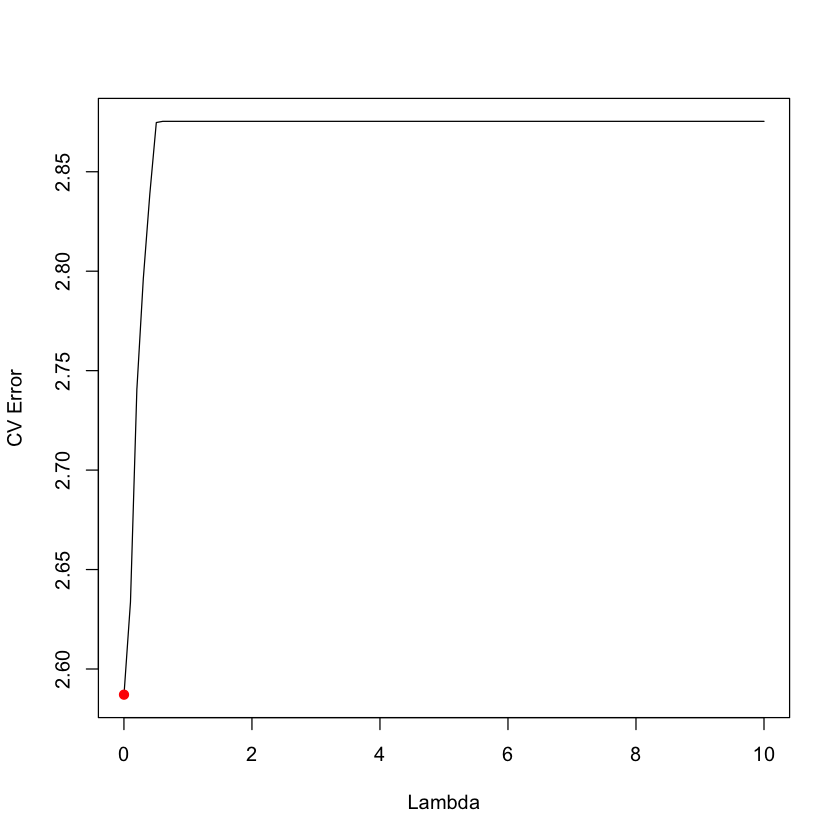

In [25]:
cv_error <- lasso_cv_model$cvm

# Plot the cross-validation error curve
plot(lasso_cv_model$lambda, cv_error, type = "l", xlab = "Lambda", ylab = "CV Error")
points(best_lambda, min(cv_error), col = "red", pch = 19)

In [26]:
# Get the minimum cross-validation error
min_cv_error = min(lasso_cv_model$cvm)

# Print the minimum cross-validation error
print(paste("Minimum CV error:", min_cv_error))

[1] "Minimum CV error: 2.58709373465739"


* We got minimum CV error of 2.587 for the Lambda value of 0.001.

In [33]:
set.seed(1)
lasso_best_model = glmnet(x, y, alpha = 1, lambda = best_lambda)
coef(lasso_best_model)

5 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept) 12.2564960667
X2           0.0073550643
X3           0.0005812564
X4          -0.3288262318
X5          -0.0094429565

* We can see that coefficient values shrinking towards zero.

### Regression Tree

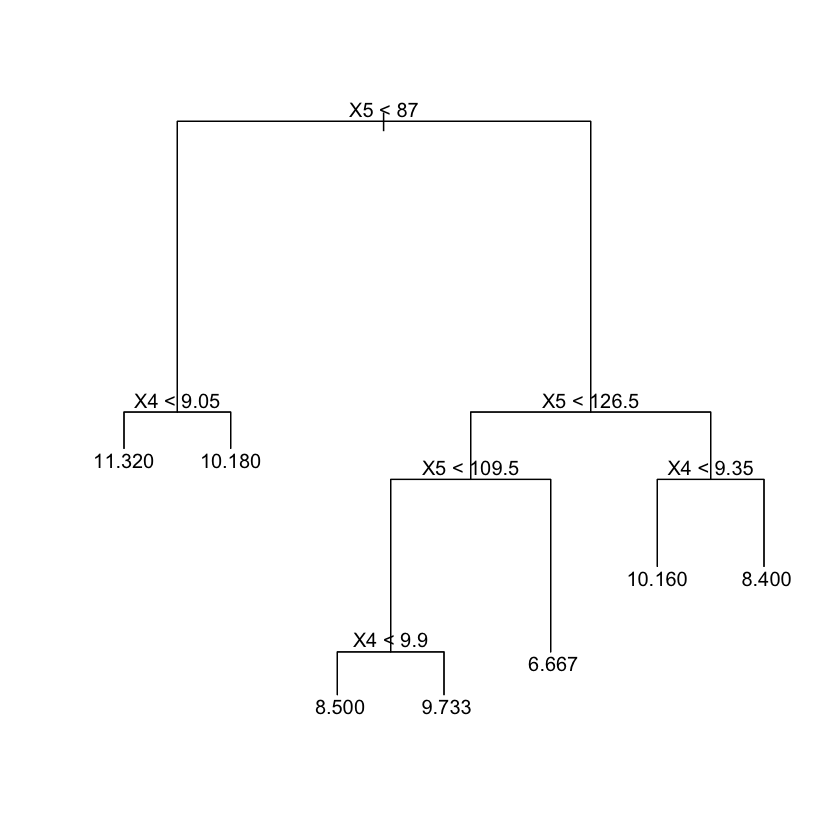

In [28]:
library(tree)
set.seed(1)
tree_model <-tree(X1~.,health_df)
plot(tree_model)
text(tree_model, pretty = 0)

* From the tree we can see that Split with X5 has explained large amount of variance in the data.

In [29]:
set.seed(1)
tree_model_cv <- cv.tree(tree_model, FUN = prune.tree, method = "deviance")

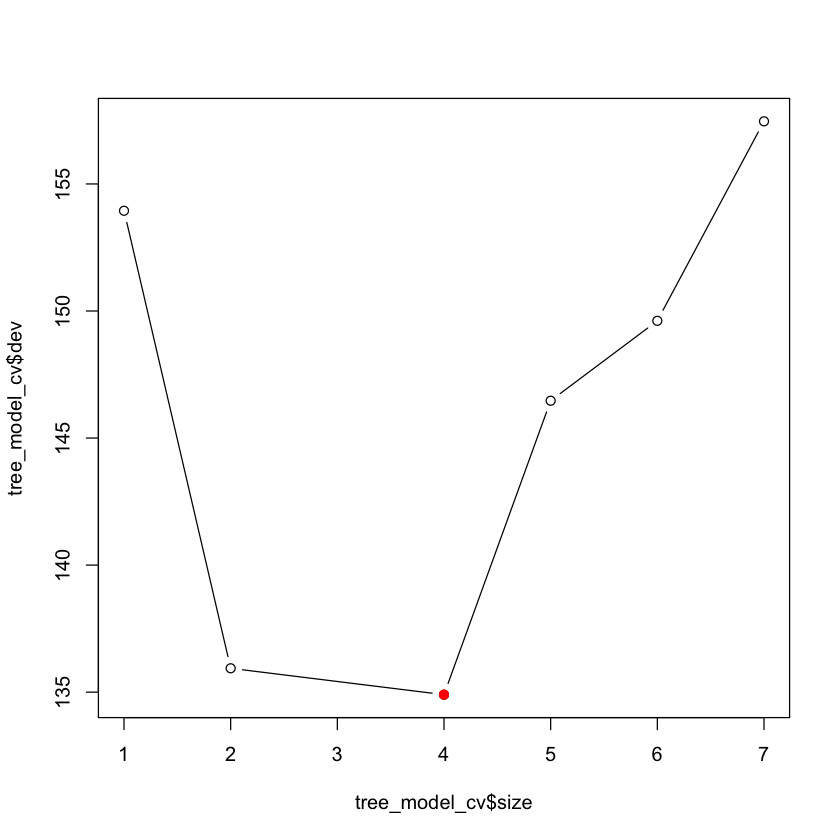

In [30]:
plot(tree_model_cv$size, tree_model_cv$dev, type = "b")
points(tree_model_cv$size[which.min(tree_model_cv$dev)], min(tree_model_cv$dev), col = "red", pch = 19)

In [31]:
# Extract cross-validation error and optimal tree size
print(paste('Minimum CV Error is :', min(tree_model_cv$dev), 'Occured for the tree size of', 
tree_model_cv$size[which.min(tree_model_cv$dev)]))


[1] "Minimum CV Error is : 134.900923234265 Occured for the tree size of 4"


"Minimum CV Deviance is : 134.900923234265 Occured for the tree size of 4"

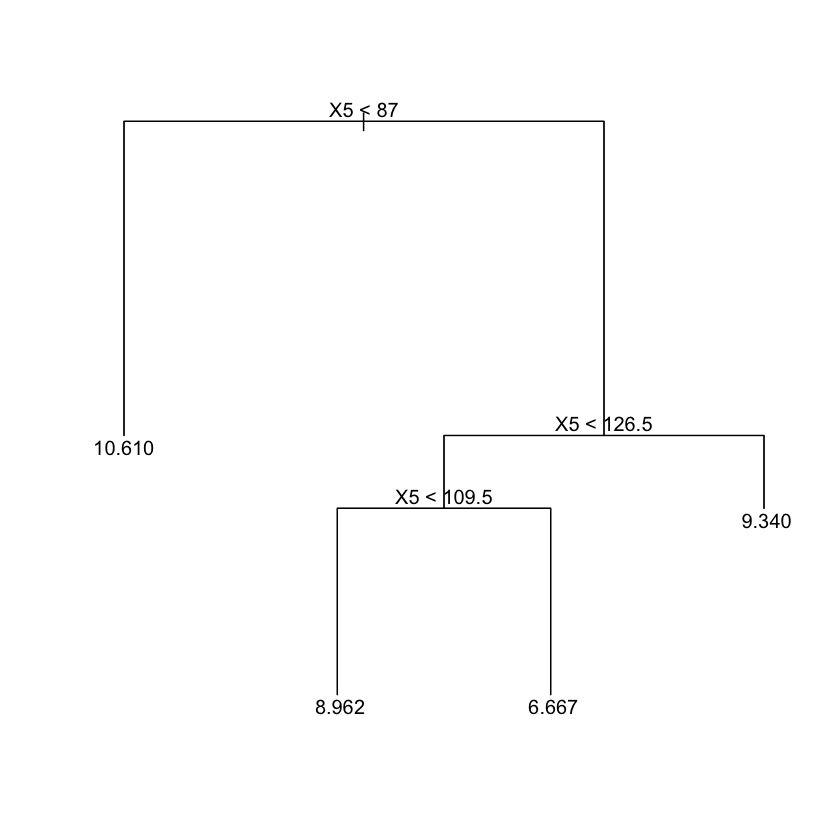

In [32]:
pruned_tree = prune.tree(tree_model, best = tree_model_cv$size[which.min(tree_model_cv$dev)]) 

plot(pruned_tree)
text(pruned_tree, pretty = 0)

* From the pruned tree we can see that Split with only X5 has explained significant amount of variance in the data. It further proves our observation from t-statistic and subset selection that only X5 has impact on response.

### Random Forest

In [33]:
library(randomForest)
library(rfUtilities)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



In [34]:
predictors = dim(health_df)[2] - 1
trees_count = rep(1:1000)

In [87]:
cv_errors = c()
set.seed(1)
for (rf_tree_count in trees_count){

    # Fitting random forest model
    rf_model = randomForest(X1 ~ ., data = health_df, m_try = sqrt(predictors), ntree = rf_tree_count)

    # Perform Cross Validation
    cv_results = rf.crossValidation(rf_model, health_df, n=5)

    cv_errors = c(cv_errors, mean(cv_results$model.mse))
}

running: regression cross-validation with 5 iterations 
running: regression cross-validation with 5 iterations 
running: regression cross-validation with 5 iterations 
running: regression cross-validation with 5 iterations 
running: regression cross-validation with 5 iterations 
running: regression cross-validation with 5 iterations 
running: regression cross-validation with 5 iterations 
running: regression cross-validation with 5 iterations 
running: regression cross-validation with 5 iterations 


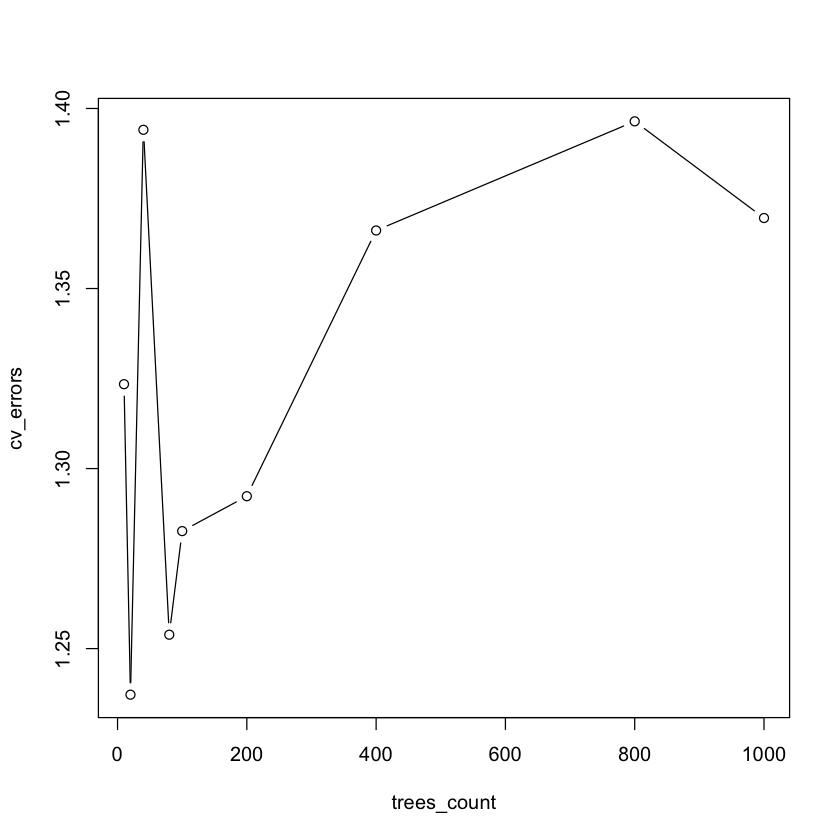

In [88]:
plot(trees_count, cv_errors, type = "b")

In [97]:
paste("Minimum CV error:", min(cv_errors), "at number of trees", which.min(cv_errors))

[1] "Minimum CV error: 1.23720639482381 at number of trees 2"

we got 'Minimum CV error: 1.23720639482381 at number of trees 2 and number of predictors used is $\sqrt(Predictors count)$ 

In [98]:
set.seed(1)
best_rf_model = randomForest(X1 ~ ., data = health_df, m_try = sqrt(predictors), ntree = which.min(cv_errors))

In [99]:
best_rf_model


Call:
 randomForest(formula = X1 ~ ., data = health_df, m_try = sqrt(predictors),      ntree = which.min(cv_errors)) 
               Type of random forest: regression
                     Number of trees: 2
No. of variables tried at each split: 1

          Mean of squared residuals: 6.651972
                    % Var explained: -145.29

# Part - 2 : Airfoil Self Noise Dataset

In [40]:
airfoil_df <- read.table("data/airfoil_self_noise.dat")
head(airfoil_df)

,V1,V2,V3,V4,V5,V6
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,800,0,0.3048,71.3,0.00266337,126.201
2,1000,0,0.3048,71.3,0.00266337,125.201
3,1250,0,0.3048,71.3,0.00266337,125.951
4,1600,0,0.3048,71.3,0.00266337,127.591
5,2000,0,0.3048,71.3,0.00266337,127.461
6,2500,0,0.3048,71.3,0.00266337,125.571


In [41]:
cat("Dimesions of the data:",dim(airfoil_df))

Dimesions of the data: 1503 6

In [42]:
paste("Number of NA Values: ",sum(is.na(airfoil_df)))

[1] "Number of NA Values:  0"

### Exploratory Data Analysis

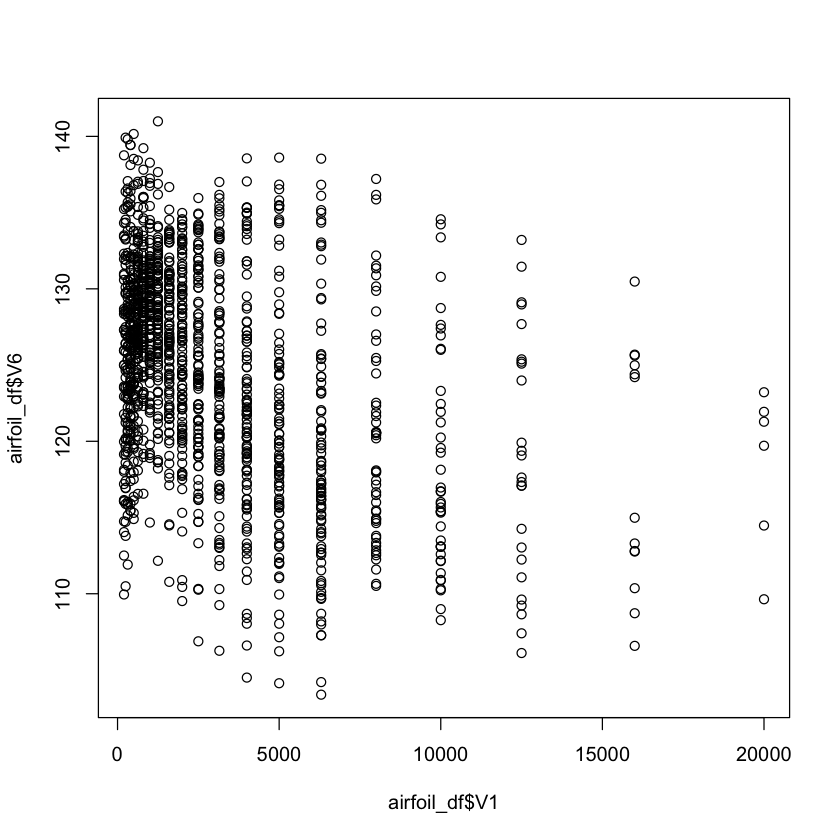

In [43]:
plot(x = airfoil_df$V1, y=airfoil_df$V6)

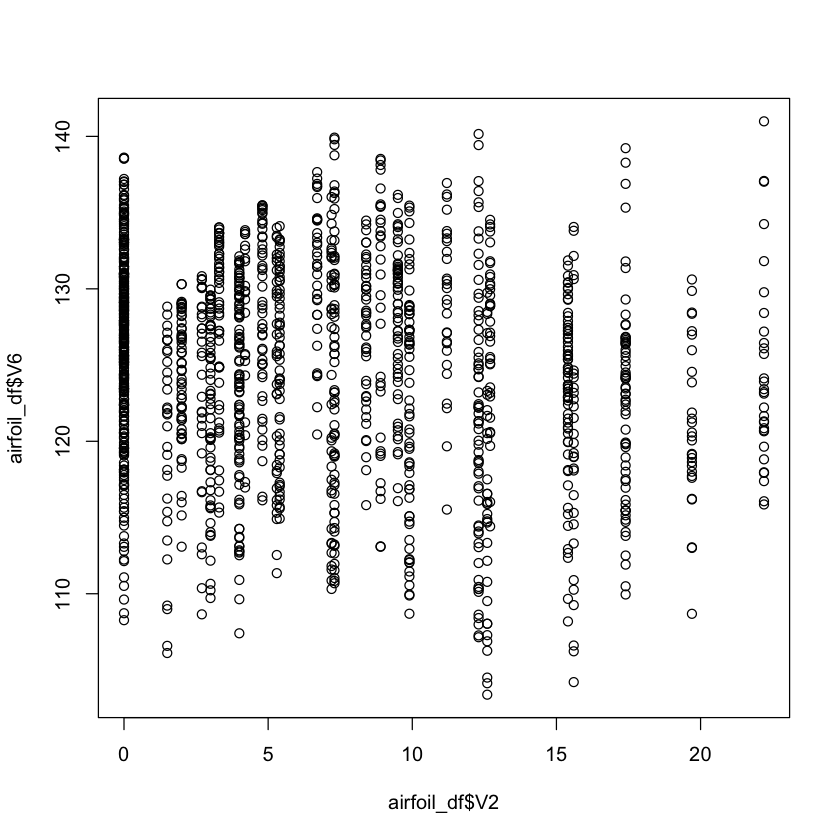

In [44]:
plot(x = airfoil_df$V2, y=airfoil_df$V6)

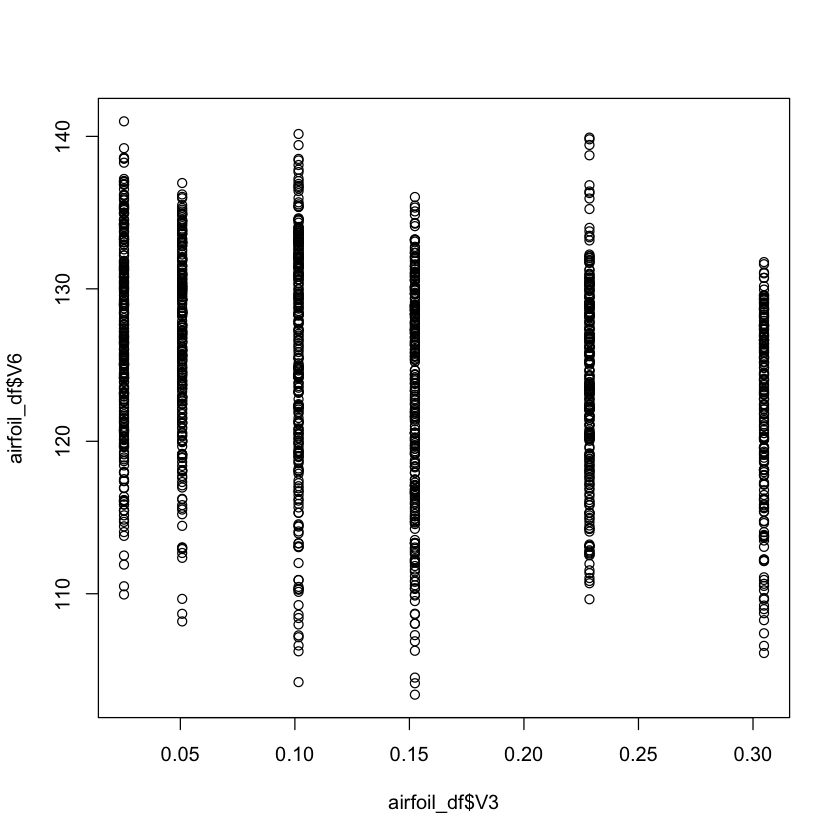

In [45]:
plot(x = airfoil_df$V3, y=airfoil_df$V6)

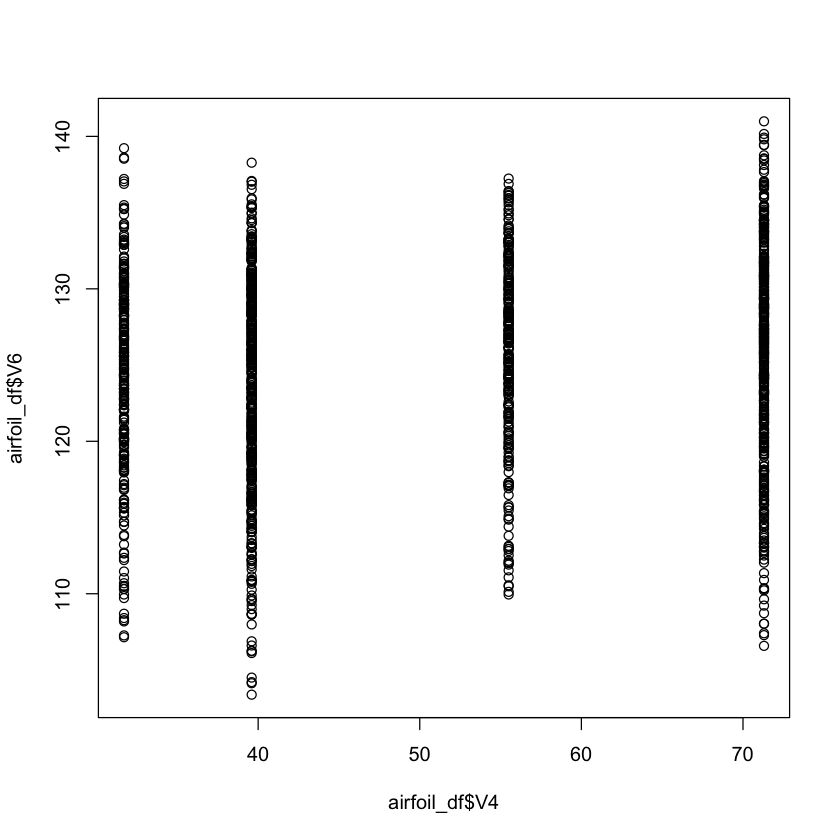

In [46]:
plot(x = airfoil_df$V4, y=airfoil_df$V6)

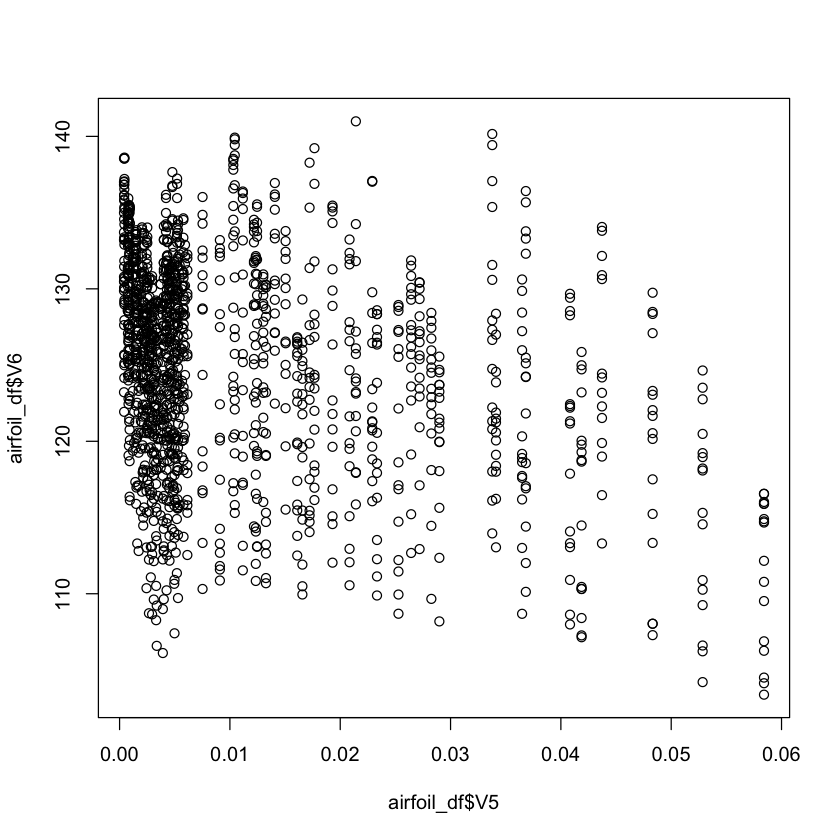

In [47]:
plot(x = airfoil_df$V5, y=airfoil_df$V6)

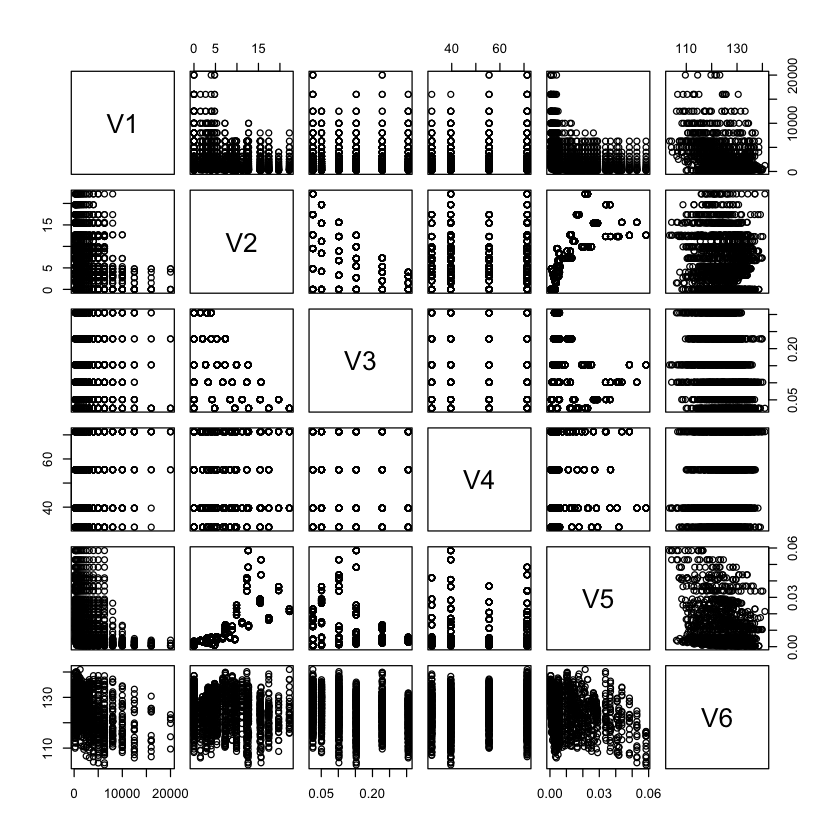

In [48]:
pairs(airfoil_df)

### Linear Regression

In [49]:
library(boot)
lm_model = glm(V6 ~ ., data = airfoil_df)
lm_cv_model = cv.glm(data=airfoil_df, lm_model, K = 5)
cv_error = lm_cv_model$delta[1]

print(paste("CV error:", cv_error))

[1] "CV error: 23.3703288570954"


* On Performing Cross Validation the estimated test error for linear regression was: 23.37

In [50]:
lm_model <- lm(V6 ~ ., data = airfoil_df)
summary(lm_model)


Call:
lm(formula = V6 ~ ., data = airfoil_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.480  -2.882  -0.209   3.152  16.064 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.328e+02  5.447e-01  243.87   <2e-16 ***
V1          -1.282e-03  4.211e-05  -30.45   <2e-16 ***
V2          -4.219e-01  3.890e-02  -10.85   <2e-16 ***
V3          -3.569e+01  1.630e+00  -21.89   <2e-16 ***
V4           9.985e-02  8.132e-03   12.28   <2e-16 ***
V5          -1.473e+02  1.501e+01   -9.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.809 on 1497 degrees of freedom
Multiple R-squared:  0.5157,	Adjusted R-squared:  0.5141 
F-statistic: 318.8 on 5 and 1497 DF,  p-value: < 2.2e-16


* The P - value of F - statistic says that all predictor has significant effect on the the response.
* The P-values of t-statistic also  justifies the same.

In [51]:
# Confidence interval of Coefficeints
confint (lm_model)

,2.5 %,97.5 %
(Intercept),1.317653e+02,1.339023e+02
V1,-1.364799e-03,-1.199615e-03
V2,-4.982083e-01,-3.456151e-01
V3,-3.888617e+01,-3.248983e+01
V4,8.390221e-02,1.158059e-01
V5,-1.767525e+02,-1.178485e+02


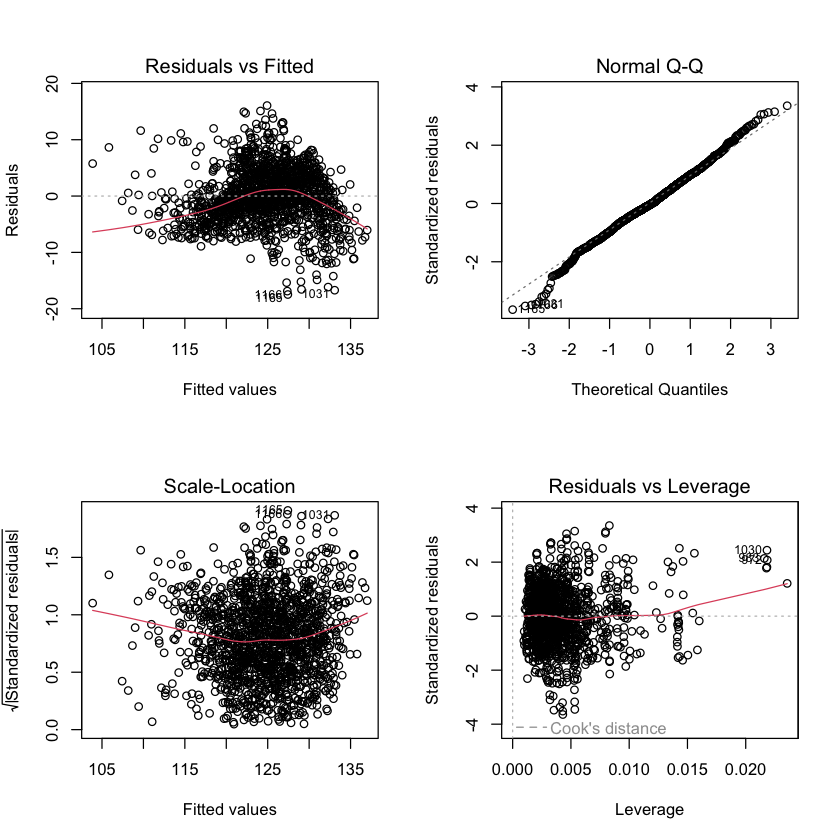

In [52]:
par(mfrow = c(2,2))
plot(lm_model)

Problems in the fit: <br>
1. The Residual vs Fitted Values shows no significant non-linearity in the data.
2. The plot also says that there is constant variance in the errors, which shows that our assumption that errors $\epsilon$ has constant variance is right. This is further justified by the Fitted Values vs $\sqrt{Standardized-residuals}$ plot. 
3. The quantile-quantile plot showed errors deviating from the normality assumption at left end of the tail.
4. In the bottom-right plot we can see, some points have standardized residuals greater than 3, which makes them outliers.
5. The cutoff for the leverage point threshold is $\frac{2p}{n}$ where p is the number of predictors, which is one in this case, and n is the number of observations, which is 53 in this case. Therefore, the cutoff is $\frac{2*5}{1503} = 0.0066$. Hence, there are some leverage points in this dataset.
6. As some observations qualified as both outliers and leverage points, we can safely say we have some influential points.

### Subset Selection

In [53]:

# Load the leaps package
library(leaps)

# Perform best subset selection using the regsubsets function
subset_model <- regsubsets(V6 ~ ., data = airfoil_df, nvmax = 6)

summary(subset_model)


Subset selection object
Call: regsubsets.formula(V6 ~ ., data = airfoil_df, nvmax = 6)
5 Variables  (and intercept)
   Forced in Forced out
V1     FALSE      FALSE
V2     FALSE      FALSE
V3     FALSE      FALSE
V4     FALSE      FALSE
V5     FALSE      FALSE
1 subsets of each size up to 5
Selection Algorithm: exhaustive
         V1  V2  V3  V4  V5 
1  ( 1 ) "*" " " " " " " " "
2  ( 1 ) "*" " " " " " " "*"
3  ( 1 ) "*" " " "*" " " "*"
4  ( 1 ) "*" "*" "*" "*" " "
5  ( 1 ) "*" "*" "*" "*" "*"

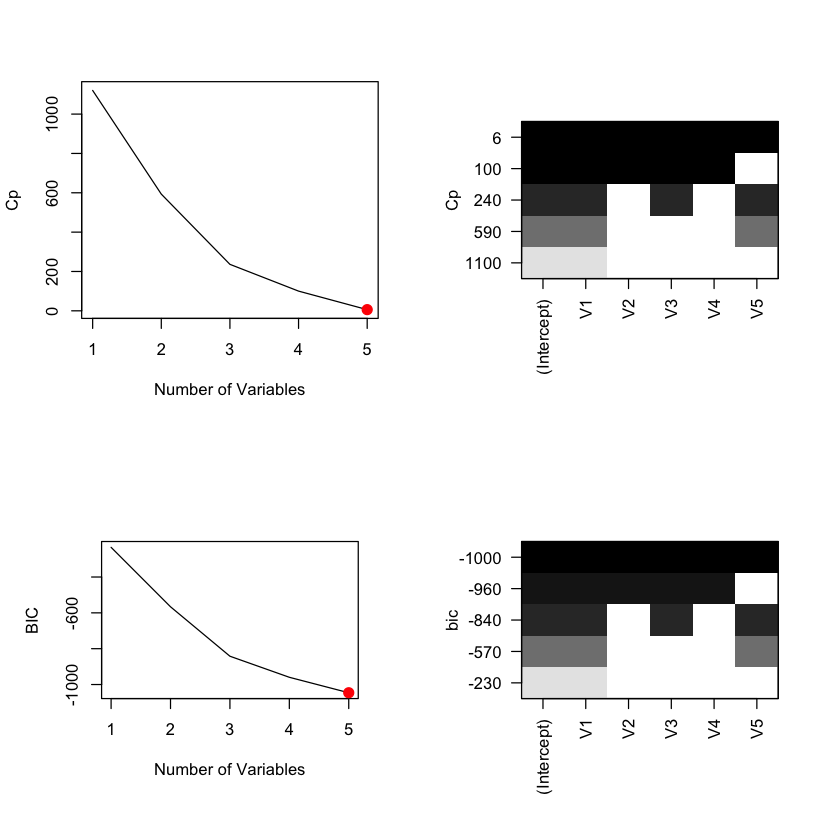

In [54]:
regfit_summary = summary(subset_model)

par(mfrow = c(2,2))

# Drawing plots for CP Metric
plot(regfit_summary$cp, xlab = "Number of Variables", ylab = "Cp",type = "l")
points(which.min(regfit_summary$cp), regfit_summary$cp[which.min(regfit_summary$cp)], col = "red", cex = 2, pch = 20)
plot(subset_model, scale = "Cp")

# Drawing plots for BIC Metric
plot(regfit_summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l")
points(which.min(regfit_summary$bic), regfit_summary$bic[which.min(regfit_summary$bic)], col = "red", cex = 2, pch = 20)
plot(subset_model, scale = "bic")

* Above plot show that model with all predictor does better than the rest.
* This goes hand in hand with what we observed with t-test p-values.

In [55]:
best_subset_lm_model = glm(V6 ~ ., data = airfoil_df)
best_subset_lm_cv_model = cv.glm(data=airfoil_df, best_subset_lm_model, K = 5)
cv_error = best_subset_lm_cv_model$delta[1]

In [56]:
print(paste("CV error:", cv_error))

[1] "CV error: 23.2549261785911"


* On Performing Cross Validation the estimated test error for best subset selected linear regression(with only one predictor) was: 23.25

### Ridge Regression

In [58]:
x = model.matrix(V6 ~ ., airfoil_df)[, -1]
y = airfoil_df$V6

In [59]:
# Set up the cross-validation grid
cv_grid = expand.grid(lambda = seq(from = 0.0001, to = 10, length = 100))

# Perform cross-validation using the cv.glmnet function
rr_cv_model = cv.glmnet(x, y, alpha = 0, lambda = cv_grid$lambda, nfolds = 5)

# Select the best value of lambda
best_lambda = rr_cv_model$lambda.min

# Print the minimum cross-validation error
print(paste("Best Lambda Value:", best_lambda))

[1] "Best Lambda Value: 1e-04"


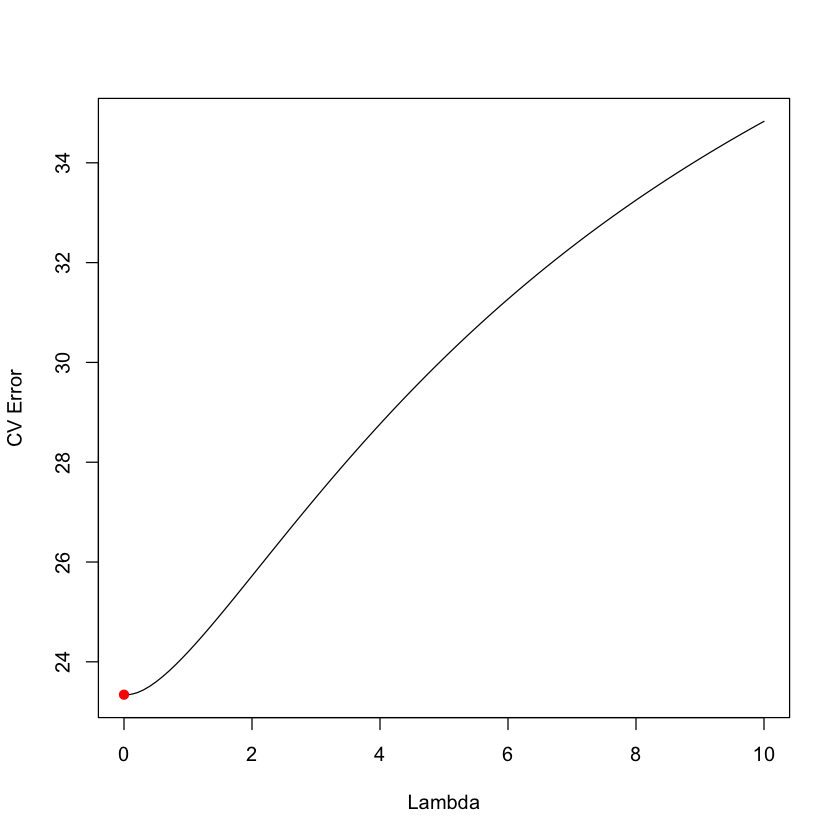

In [60]:
cv_error <- rr_cv_model$cvm

# Plot the cross-validation error curve
plot(rr_cv_model$lambda, cv_error, type = "l", xlab = "Lambda", ylab = "CV Error")
points(best_lambda, min(cv_error), col = "red", pch = 19)

In [61]:
# Get the minimum cross-validation error
min_cv_error = min(rr_cv_model$cvm)

# Print the minimum cross-validation error
print(paste("Minimum CV error:", min_cv_error))

[1] "Minimum CV error: 23.3416951321391"


* We got minimum CV error of 23.34 for the Lambda value of 1e-4.

In [62]:
rr_best_model = glmnet(x, y, alpha = 0, lambda = best_lambda)
coef(rr_best_model)

6 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)  1.328315e+02
V1          -1.282033e-03
V2          -4.215147e-01
V3          -3.567978e+01
V4           9.983830e-02
V5          -1.474106e+02

### Lasso Regression

In [63]:
# Set up the cross-validation grid
cv_grid = expand.grid(lambda = seq(from = 0.001, to = 10, length = 100))

# Perform cross-validation using the cv.glmnet function
lasso_cv_model = cv.glmnet(x, y, alpha = 1, lambda = cv_grid$lambda, nfolds = 5)

# Select the best value of lambda
best_lambda = lasso_cv_model$lambda.min

# Print the minimum cross-validation error
print(paste("Best Lambda Value:", best_lambda))

[1] "Best Lambda Value: 0.001"


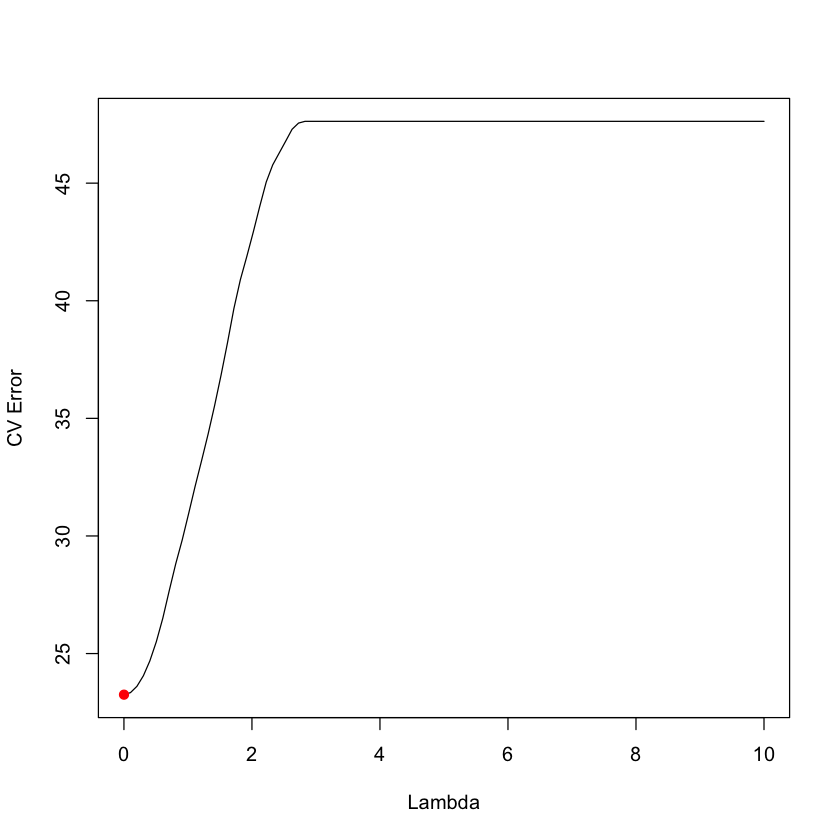

In [64]:
cv_error <- lasso_cv_model$cvm

# Plot the cross-validation error curve
plot(lasso_cv_model$lambda, cv_error, type = "l", xlab = "Lambda", ylab = "CV Error")
points(best_lambda, min(cv_error), col = "red", pch = 19)

In [65]:
# Get the minimum cross-validation error
min_cv_error = min(lasso_cv_model$cvm)

# Print the minimum cross-validation error
print(paste("Minimum CV error:", min_cv_error))

[1] "Minimum CV error: 23.252373329225"


* We got minimum CV error of 23.23 for the Lambda value of 0.001.

In [66]:
lasso_best_model = glmnet(x, y, alpha = 1, lambda = best_lambda)
coef(lasso_best_model)

6 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)  1.328277e+02
V1          -1.281433e-03
V2          -4.209949e-01
V3          -3.565375e+01
V4           9.974697e-02
V5          -1.474393e+02

### Regression Tree

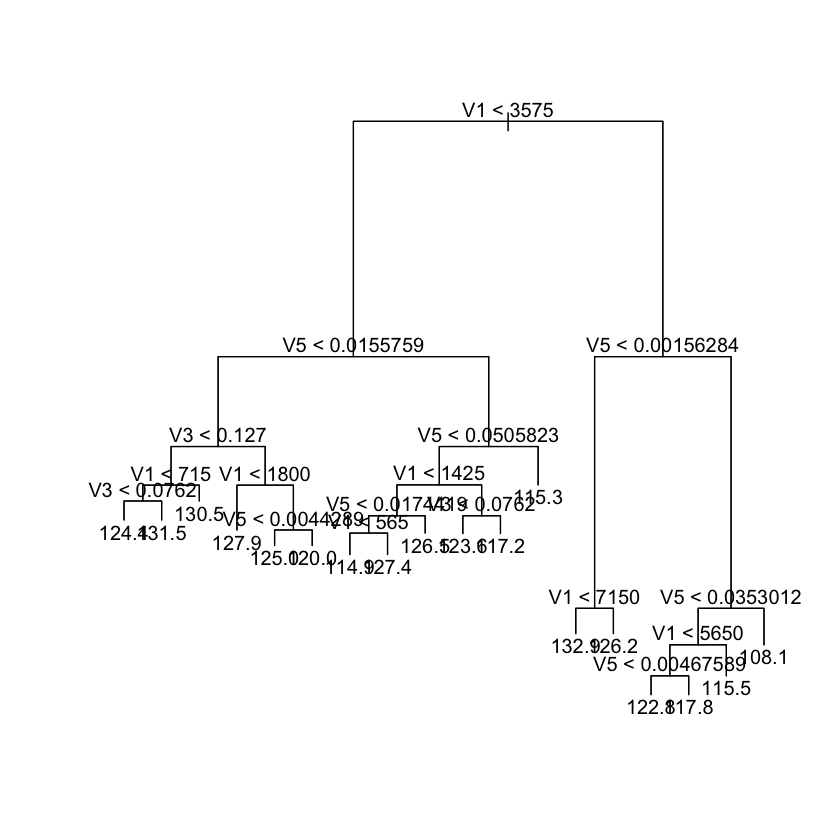

In [67]:
set.seed(1)
tree_model <-tree(V6~.,airfoil_df)
plot(tree_model)
text(tree_model, pretty = 0)

* From the tree we can see that Split with V5 has explained large amount of variance in the data.

In [68]:
set.seed(1)
tree_model_cv <- cv.tree(tree_model, FUN = prune.tree, method = "deviance")

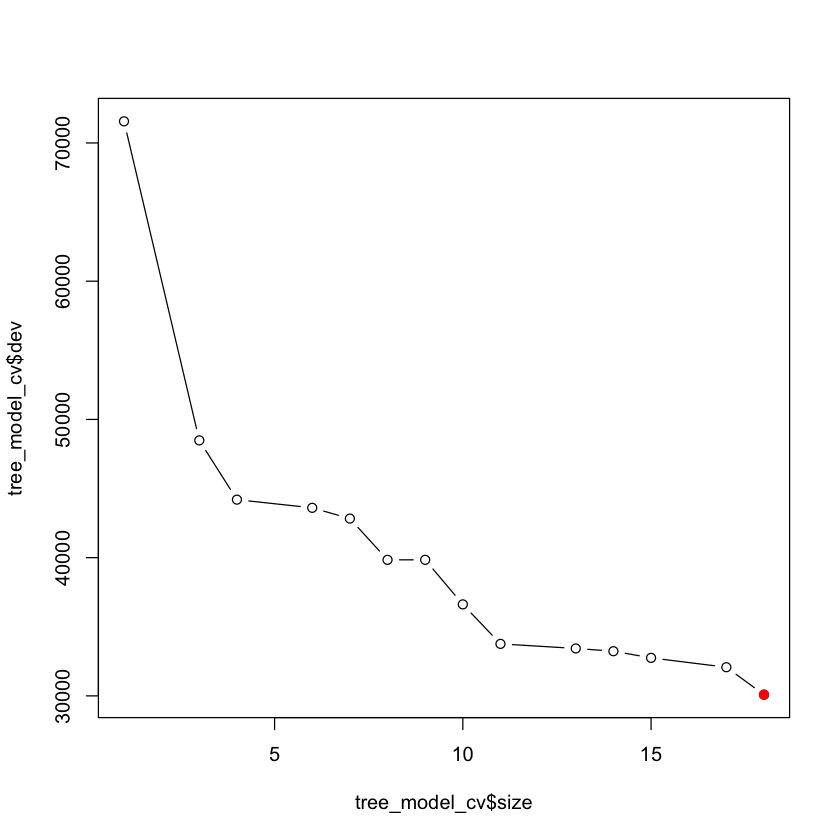

In [69]:
plot(tree_model_cv$size, tree_model_cv$dev, type = "b")
points(tree_model_cv$size[which.min(tree_model_cv$dev)], min(tree_model_cv$dev), col = "red", pch = 19)

In [70]:
# Extract cross-validation error and optimal tree size
print(paste('Minimum CV Error is :', min(tree_model_cv$dev), 'Occured for the tree size of', 
tree_model_cv$size[which.min(tree_model_cv$dev)]))

[1] "Minimum CV Error is : 30087.9680069964 Occured for the tree size of 18"


"Minimum CV Deviance is : 300087.900923234265 Occured for the tree size of 18"

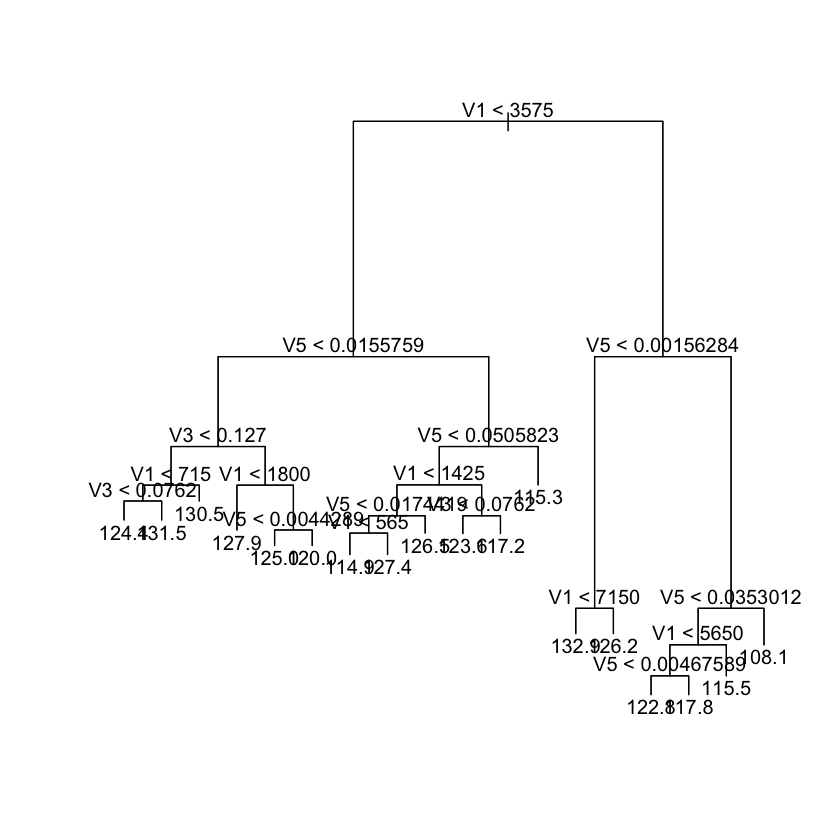

In [71]:
pruned_tree = prune.tree(tree_model, best = tree_model_cv$size[which.min(tree_model_cv$dev)]) 

plot(pruned_tree)
text(pruned_tree, pretty = 0)

### Random Forest

In [76]:
predictors = dim(airfoil_df)[2] - 1
trees_count = c(10, 20, 40, 80, 100, 200, 400, 800, 1000)

In [102]:
cv_errors = c()
set.seed(1)
for (rf_tree_count in trees_count){

    # Fitting random forest model
    rf_model = randomForest(V6 ~ ., data = airfoil_df, m_try = sqrt(predictors), ntree = rf_tree_count)

    # Perform Cross Validation
    cv_results = rf.crossValidation(rf_model, airfoil_df, n=5)

    cv_errors = c(cv_errors, mean(cv_results$model.mse))
}

running: regression cross-validation with 5 iterations 
running: regression cross-validation with 5 iterations 
running: regression cross-validation with 5 iterations 
running: regression cross-validation with 5 iterations 
running: regression cross-validation with 5 iterations 
running: regression cross-validation with 5 iterations 
running: regression cross-validation with 5 iterations 
running: regression cross-validation with 5 iterations 
running: regression cross-validation with 5 iterations 


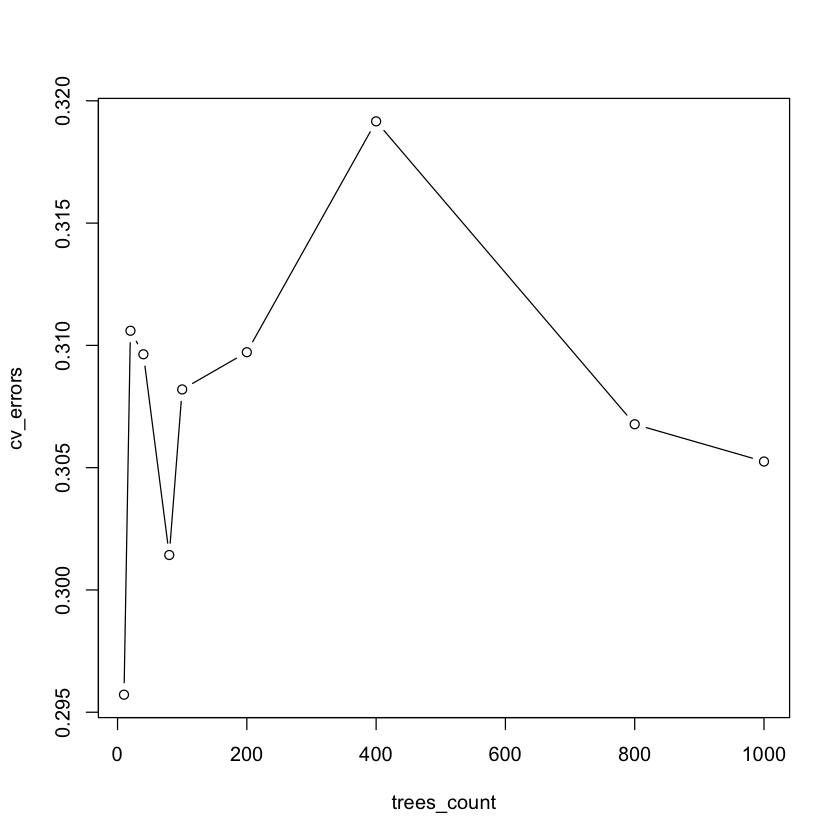

In [103]:
plot(trees_count, cv_errors, type = "b")

In [104]:
paste("Minimum CV error:", min(cv_errors), "at number of trees", which.min(cv_errors))

[1] "Minimum CV error: 0.295718236614319 at number of trees 1"

we got 'Minimum CV error: 0.295 at number of trees 1 and number of predictors used is $\sqrt(Predictors count)$ 

In [105]:
set.seed(1)
best_rf_model = randomForest(V6 ~ ., data = airfoil_df, m_try = sqrt(predictors), ntree = which.min(cv_errors))

In [107]:
best_rf_model


Call:
 randomForest(formula = V6 ~ ., data = airfoil_df, m_try = sqrt(predictors),      ntree = which.min(cv_errors)) 
               Type of random forest: regression
                     Number of trees: 1
No. of variables tried at each split: 1

          Mean of squared residuals: 23.3251
                    % Var explained: 50.96